# Profil d'acheteur de tapis roulant

L'équipe d'études de marché d'AeroFit souhaite identifier les caractéristiques du public cible pour chaque type de tapis roulant proposé par l'entreprise, afin de fournir une meilleure recommandation des tapis roulants aux nouveaux clients. L'équipe décide d'étudier s'il existe des différences entre les produits en ce qui concerne les caractéristiques des clients.

Effectuez des analyses descriptives pour créer un profil client pour chaque produit de tapis roulant AeroFit en développant des tableaux et des graphiques appropriés. Pour chaque produit de tapis roulant AeroFit, construisez des tableaux de contingence bidirectionnels et calculez toutes les probabilités conditionnelles et marginales ainsi que leurs informations/impact sur l'entreprise.

## Portefeuille de produits :

- Le KP281 est un tapis roulant d'entrée de gamme vendu 1 500
- Le KP481 est destiné aux coureurs de niveau intermédiaire et se vend 1 750
- Le tapis roulant KP781 possède des fonctionnalités avancées et se vend 2 500

## Importation et première observations

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasetclients/aerofit_treadmill_data.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [9]:
#Vérification de l'asymétrie
checkSkew = df.copy()
checkSkew = checkSkew.drop(columns=["Product", "Gender", "MaritalStatus"])

checkSkew.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [10]:
df.duplicated(subset=None,keep='first').sum()

0

In [11]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Premières observations 

- On trouve trois produits distincts dans le dataset, 180 au total. Parmis ces produits, le plus acheté est le KP281 avec 80 achats
- 75% des utilisateurs ont 33 ans ou moins
- L'âge minimum est de 18 ans, le maximum est de 50 ans
- Les colonnes income et miles ont une asymétrie élevée, on peut estimer quelques abérrations
- La majorité des acheteurs sont des hommes (104/180), sans pour autant être très dominant
- Pas de valeurs manquantes, ni de lignes dupliquées

## Analyse sans graphiques

### Répartition des valeurs

- Product
- Age
- Genre
- MaritalStatus
- Fitness
- Usage

In [15]:
cols = ['Product', 'Age', 'Gender', 'MaritalStatus', 'Fitness', 'Usage']

for col in cols:
    print(f"Compte des valeurs pour la colonne {col} : {df[col].value_counts()}")
    print("")

Compte des valeurs pour la colonne Product : Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Compte des valeurs pour la colonne Age : Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

Compte des valeurs pour la colonne Gender : Gender
Male      104
Female     76
Name: count, dtype: int64

Compte des valeurs pour la colonne MaritalStatus : MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Compte des valeurs pour la colonne Fitness : Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

Compte des valeurs pour la colonne Usage : Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64



### Affichage des valeurs unique

- Product
- Age
- Genre
- MaritalStatus
- Miles
- Income

In [17]:
cols = ['Product', 'Age', 'Gender', 'MaritalStatus', 'Miles', 'Income']

for col in cols:
    print(f"Valeurs uniques pour la colonne {col} : ")
    print(df[col].unique())
    print("")

Valeurs uniques pour la colonne Product : 
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

Valeurs uniques pour la colonne Age : 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Valeurs uniques pour la colonne Gender : 
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Valeurs uniques pour la colonne MaritalStatus : 
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

Valeurs uniques pour la colonne Miles : 
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]

Valeurs uniques pour la colonne Income : 
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  535

## Analyse avec graphique

### Variables numériques

Création d'histogrammes et de boxplot pour vérifier la distribution, et les éventuelles aberrations

In [19]:
def create_hist_boxplot(df, col):
    fig, axes = plt.subplots(len(col), 2, figsize=(12, len(col) * 4))
    sns.set_style("whitegrid")
    
    for i, column in enumerate(col):
        sns.histplot(data=df, x=column, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution de la colonne {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot de la colonne {column}')

    plt.tight_layout()

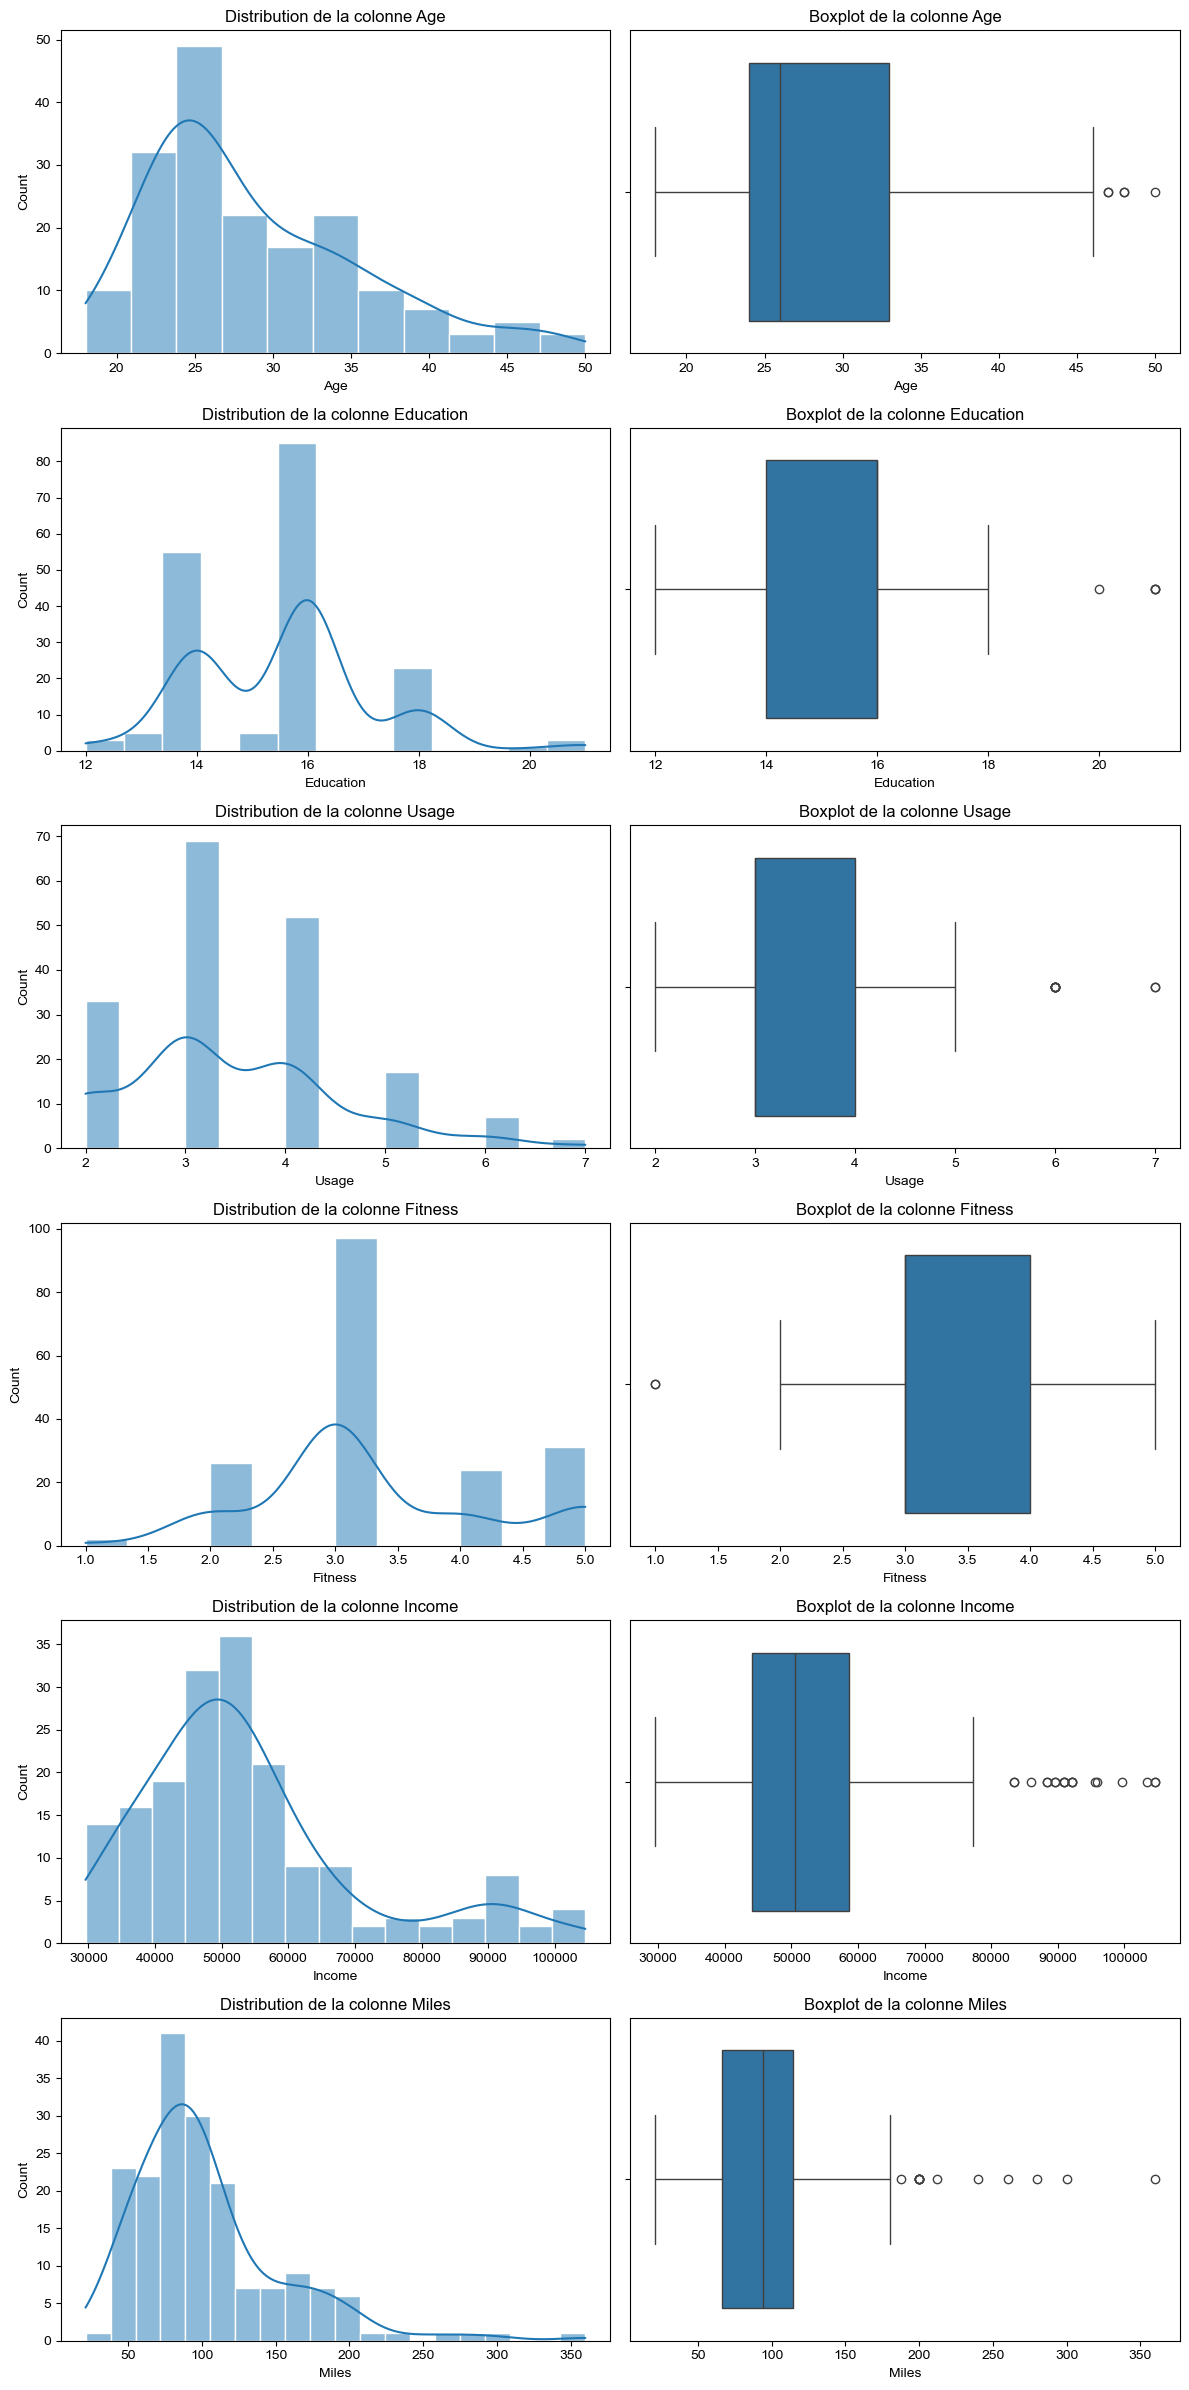

In [20]:
cols = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

create_hist_boxplot(df, cols)

### Retour des distributions

- Age : La distribution est positive, la queue penche vers la droite. On note une plus grosse proportion d'acheteurs autour des 25 ans, quelques valeurs "aberrantes" passé 45 ans. ça peut s'expliquer par la tendance qu'ont les jeunes à faire plus de sport, peut-être plus de temps aussi que les personnes plus âgées
- Education : Gros pics à 14h et 16h côté éducation
- Usage : Gros pics entre 3 et 4 fois par semaine, ce qui correspond a une bonne utilisation, quelques valeurs aberrantes à 6/7 fois par semaine, ce qui est énorme en terme d'utilisation
- Fitness : Enorme pic sur un niveau de 3/5 en Fitness, ce sont donc des personnes un peu sportives qui cherchent à acheter un tapis roulant, peut-être pour optimiser leurs routines et faire du sport à la maison. Il serait intéressant de voir si ces personnes ont prévu de faire du sport en plus du tapis roulant. Par contre, très peu de personnes débutantes ou pas sportives, qui ne voient peut être pas l'intérêt d'acheter un tapis roulant pour leur niveau
- Incomes : On se situe autour des 45'000 - 55'000, avec pas mal de valeurs aberrantes autour des 80'000$ et plus
- Miles : Un gros pic autour de 75 miles (120km), mais une distribution entre 50 et 100 miles par semaines (80-160km)

In [22]:
columns = ['MaritalStatus', 'Product', 'Gender']

allcols = {col: {} for col in columns}

for col in allcols:
    allcols[col] = df.groupby(col, observed=True).size().reset_index(name="count")

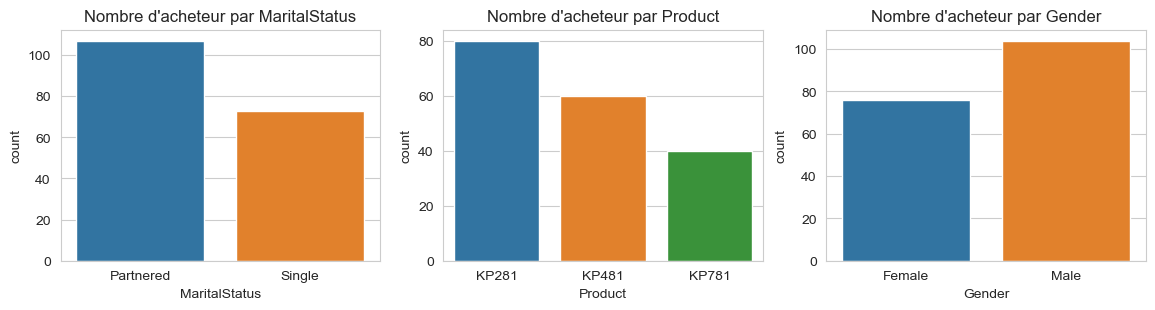

In [23]:
fig, axes = plt.subplots(1, len(allcols), figsize=(14, len(allcols)))
sns.set_style("whitegrid")

for i, col in enumerate(allcols):
    sns.barplot(data=allcols[col], x=col, y='count', hue=col, ax=axes[i])
    axes[i].set_title(f"Nombre d'acheteur par {col}")

In [24]:
prices = [1500, 1750, 2500]

for i, cnt in enumerate(allcols['Product']['count']):
    print(f"Prix du {allcols['Product']['Product'][i]} : {cnt * prices[i]} $")

Prix du KP281 : 120000 $
Prix du KP481 : 105000 $
Prix du KP781 : 100000 $


### Retour d'observation

- Les personnes en couple ont plus de chance d'acheter un des produits
- Le KP281 est le produit le plus vendu et le plus rentable ; Le KP781 est le moins vendu mais est presque aussi rentable que le KP481
- La majorité des acheteurs sont des hommes

## Analyse bivariable

Analyse des relations, des ventes entre genre, statut marital... Par produit etc

In [27]:
columns = ['MaritalStatus', 'Gender', 'Age', 'Usage', 'Fitness']

bivariable = {col: {} for col in columns}

for cols in bivariable:
    bivariable[cols] = df.groupby(["Product", cols], observed=True).size().reset_index(name="count")

bivariable

{'MaritalStatus':   Product MaritalStatus  count
 0   KP281     Partnered     48
 1   KP281        Single     32
 2   KP481     Partnered     36
 3   KP481        Single     24
 4   KP781     Partnered     23
 5   KP781        Single     17,
 'Gender':   Product  Gender  count
 0   KP281  Female     40
 1   KP281    Male     40
 2   KP481  Female     29
 3   KP481    Male     31
 4   KP781  Female      7
 5   KP781    Male     33,
 'Age':    Product  Age  count
 0    KP281   18      1
 1    KP281   19      3
 2    KP281   20      2
 3    KP281   21      4
 4    KP281   22      4
 ..     ...  ...    ...
 63   KP781   40      1
 64   KP781   42      1
 65   KP781   45      1
 66   KP781   47      1
 67   KP781   48      1
 
 [68 rows x 3 columns],
 'Usage':    Product  Usage  count
 0    KP281      2     19
 1    KP281      3     37
 2    KP281      4     22
 3    KP281      5      2
 4    KP481      2     14
 5    KP481      3     31
 6    KP481      4     12
 7    KP481      5      3
 

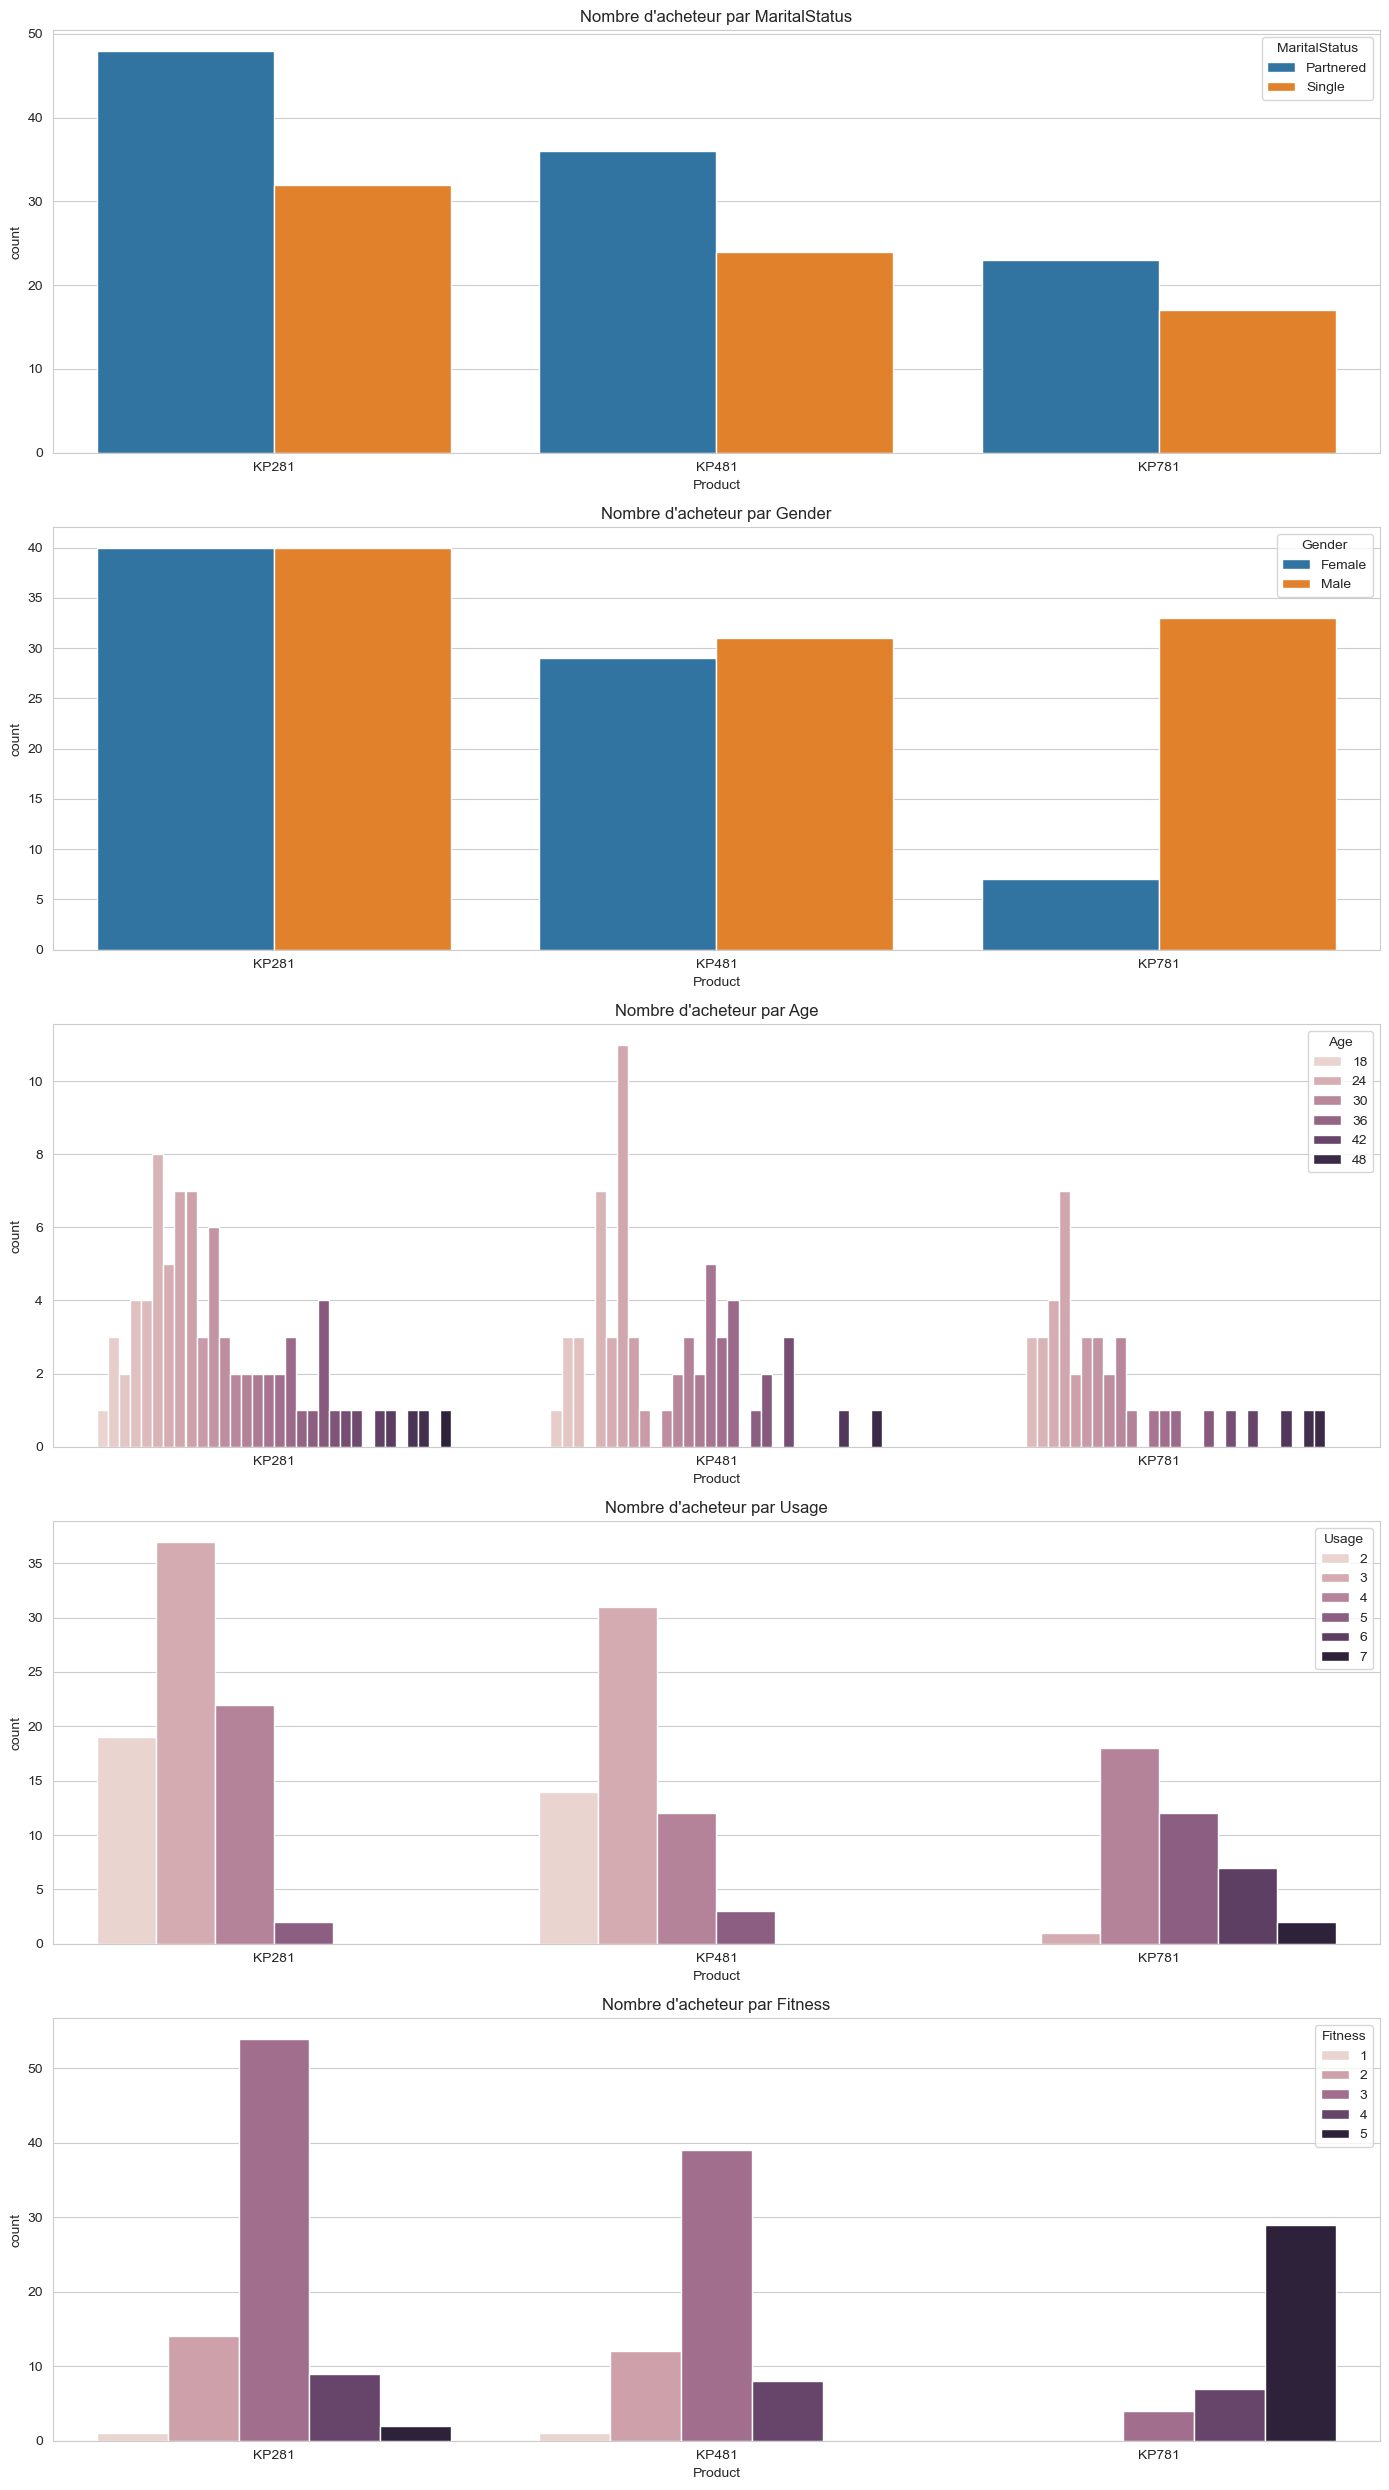

In [28]:
fig, axes = plt.subplots(len(bivariable), 1, figsize=(14, len(bivariable) * 5))
sns.set_style("whitegrid")

for i, col in enumerate(bivariable):
    sns.barplot(data=bivariable[col], x="Product", y='count', hue=col, ax=axes[i])
    axes[i].set_title(f"Nombre d'acheteur par {col}")

plt.tight_layout()

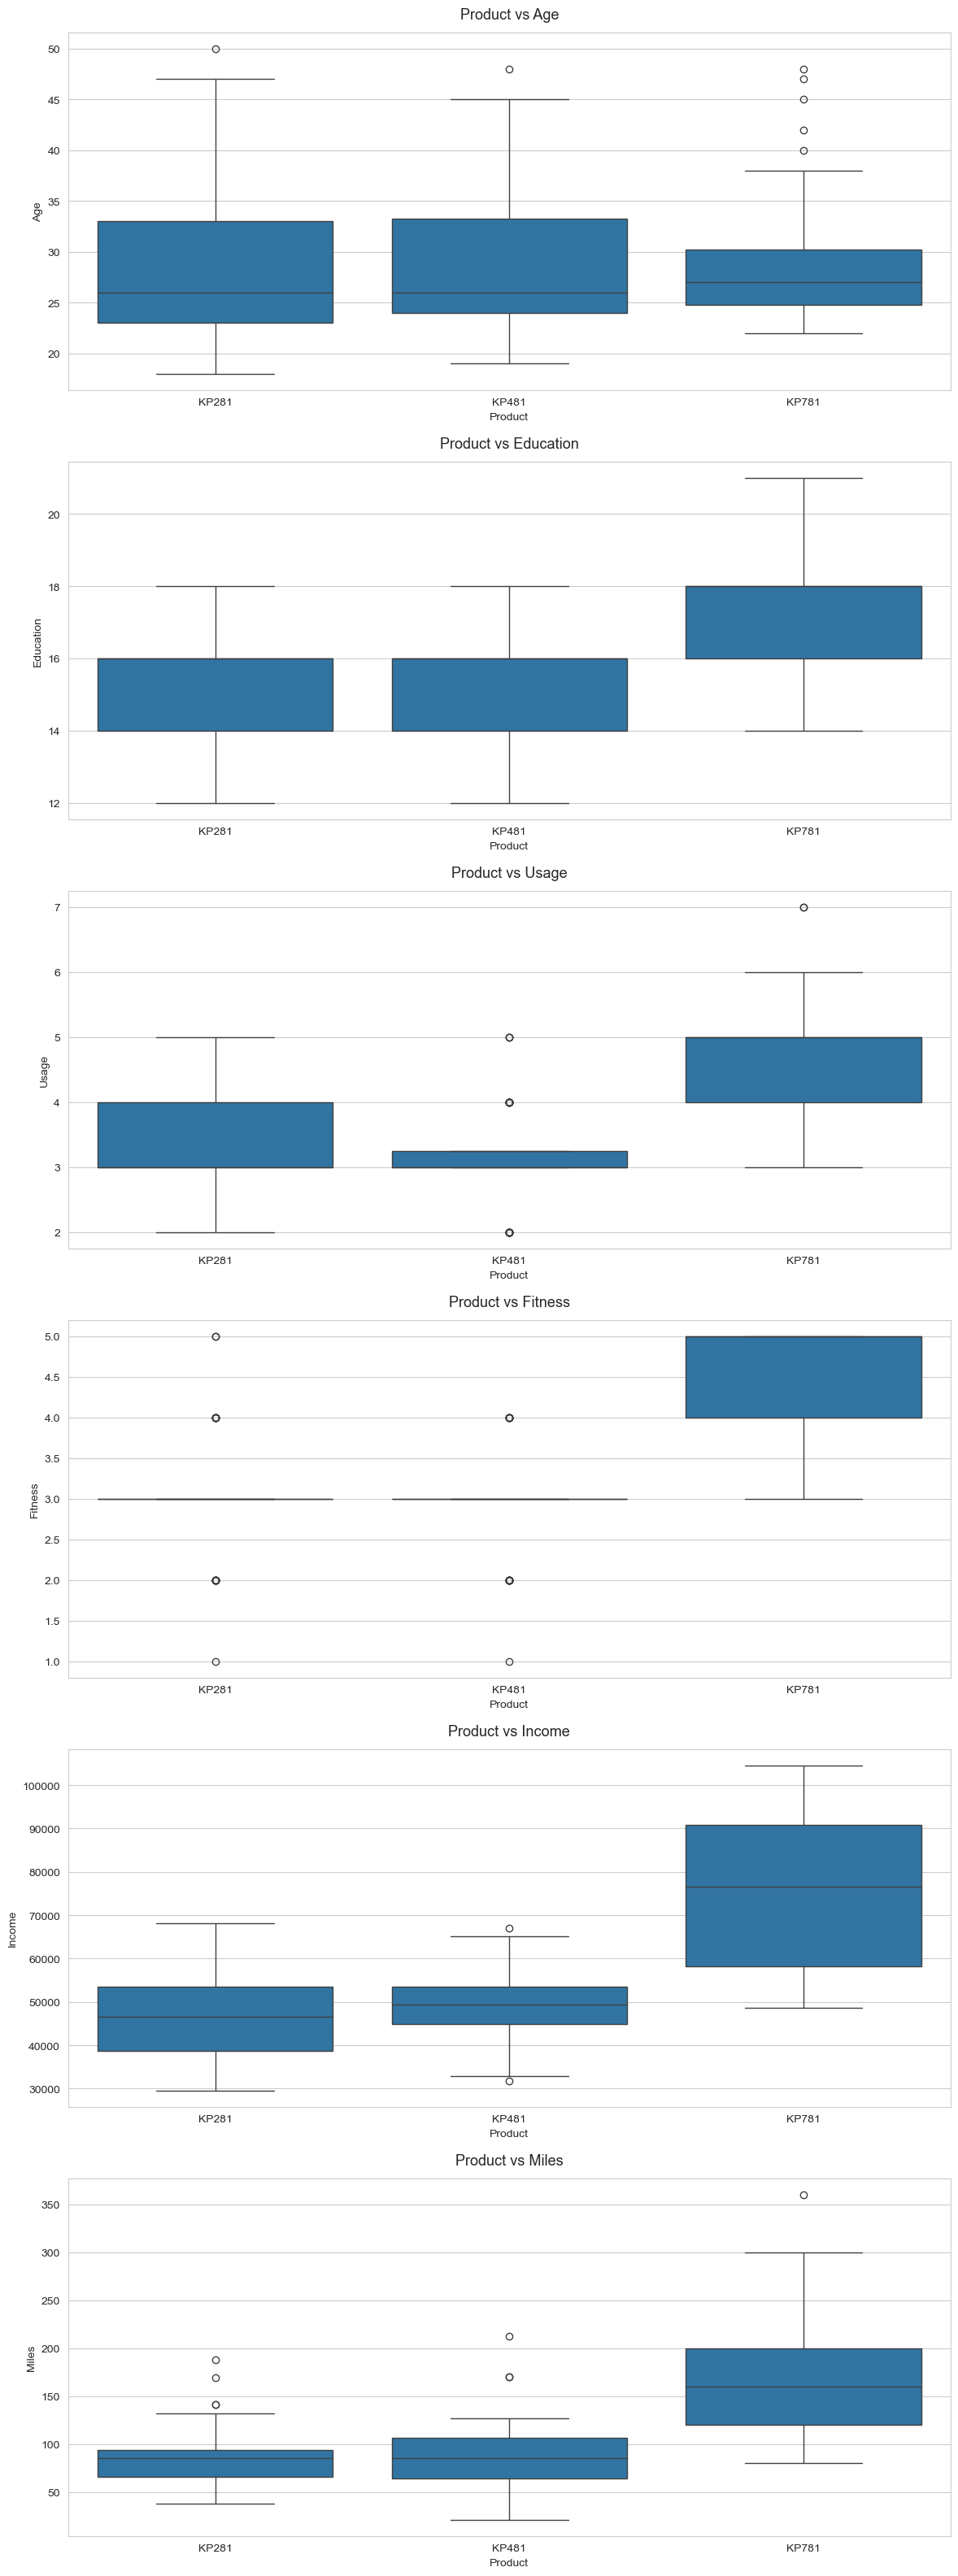

In [29]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axes = plt.subplots(len(attributes), 1, figsize=(14, len(columns) * 8))

count = 0
for i, col in enumerate(attributes):
    sns.boxplot(data=df, x='Product', y=attributes[i], ax=axes[i])
    axes[i].set_title(f"Product vs {attributes[i]}", pad=12, fontsize=13)
    count += 1

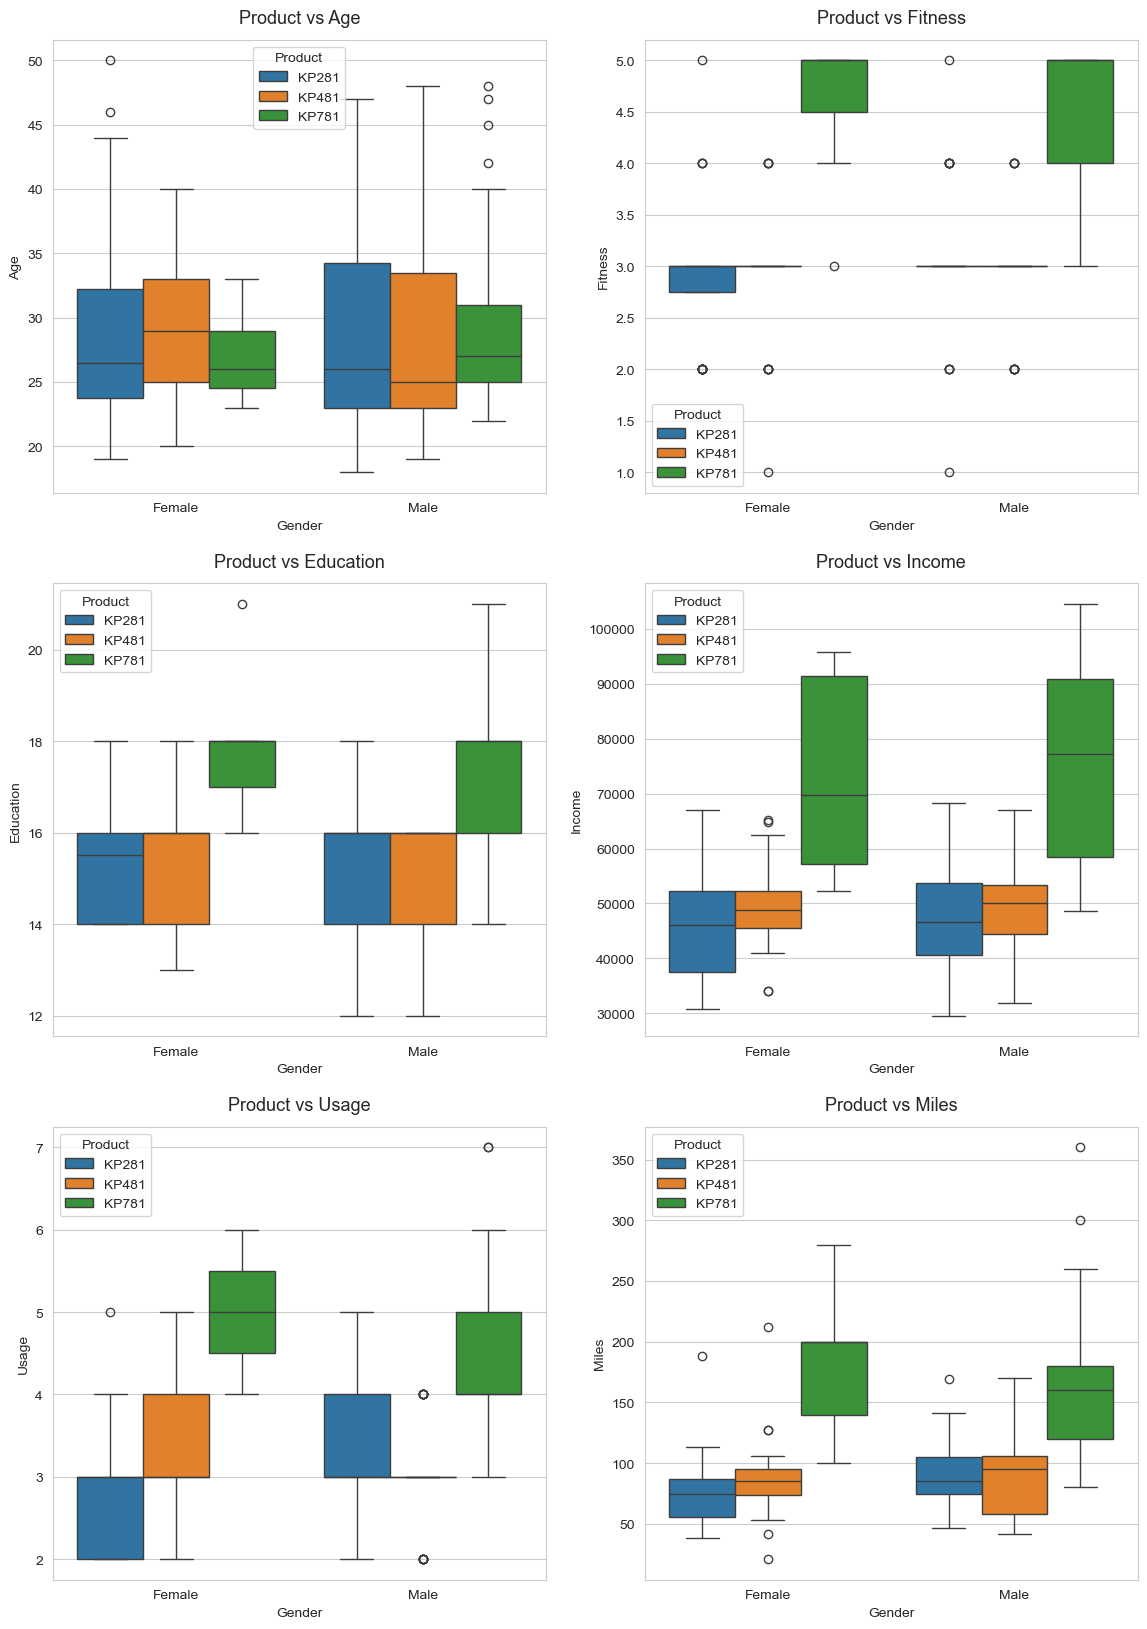

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(14, len(columns) * 4))

#Même façon que plus haut, mais permet de faire des graphs côte à côte
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axes[j,i])
        axes[j,i].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

### Observations

- Il y a autant d'homme que de femmes qui ont acheté un KP281
- Les utilisateurs de niveau moyen achètent autant des KP281/241, mais les experts achètent le KP781
- Product vs Age : On remarque que les outliers liés à l'âge sont ceux qui achètent le KP781
- Product vs Income/Miles : Les personnes avec les revenus les plus élevés / souhaitant faire le plus de miles achètent le KP781
- Product vs Usage : Plus les utilisateurs comptent l'utiliser, plus ils achètent un produit de la gamme au dessus

## Analyse des correlations

In [33]:
checkCorr = checkSkew.copy()

checkCorr.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

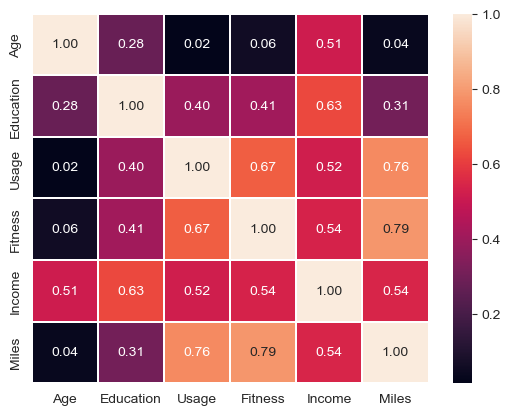

In [34]:
sns.heatmap(checkCorr.corr(), annot = True, linewidths = 0.05, fmt ='0.2f')

Il y a une grosse correlation entre Miles & Usage ainsi que Miles & Fitness, ce qui peut s'expliquer car les personnes qui s'y connaissent le mieux ou qui veulent le plus l'utiliser. Par contre, globalement aucune correlation entre l'âge et le reste, ce qui indique que ça n'est pas un soucis

## Probabilités

In [37]:
df_all = df[['Product', 'Gender', 'MaritalStatus']].melt()

df_all

,variable,value
0,Product,KP281
1,Product,KP281
2,Product,KP281
3,Product,KP281
4,Product,KP281
...,...,...
535,MaritalStatus,Single
536,MaritalStatus,Single
537,MaritalStatus,Single
538,MaritalStatus,Partnered


In [38]:
countvalues = df_all.groupby(['variable', 'value'])[['value']].count()
countvalues

value
variable      value           
Gender        Female        76
              Male         104
MaritalStatus Partnered    107
              Single        73
Product       KP281         80
              KP481         60
              KP781         40

In [39]:
(countvalues / len(df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [98]:
#Calcul de probabilités
def get_proba(df, col, col_value):
    df_cross = pd.crosstab(index=df[col_value], columns=[df['Product']])

    p_281 = df_cross['KP281'][col] / df_cross.loc[col].sum()
    p_481 = df_cross['KP481'][col] / df_cross.loc[col].sum()
    p_781 = df_cross['KP781'][col] / df_cross.loc[col].sum()

    print(f"P(KP281/{col}): {p_281:.2f}") 
    print(f"P(KP481/{col}): {p_481:.2f}")
    print(f"P(KP781/{col}): {p_781:.2f}\n")

In [106]:
cols = ['Gender', 'MaritalStatus', 'Fitness']

colvalue = {col: {} for col in cols}

for col in colvalue:
    colvalue[col] = df[col].unique()

for col in colvalue:
    print(f"Probabilités pour la colonne {col} : \n")
    for value in colvalue[col]:
        get_proba(df, value, col)

Probabilités pour la colonne Gender : 

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09

Probabilités pour la colonne MaritalStatus : 

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21

Probabilités pour la colonne Fitness : 

P(KP281/4): 0.38
P(KP481/4): 0.33
P(KP781/4): 0.29

P(KP281/3): 0.56
P(KP481/3): 0.40
P(KP781/3): 0.04

P(KP281/2): 0.54
P(KP481/2): 0.46
P(KP781/2): 0.00

P(KP281/1): 0.50
P(KP481/1): 0.50
P(KP781/1): 0.00

P(KP281/5): 0.06
P(KP481/5): 0.00
P(KP781/5): 0.94



In [128]:
df2 = df.copy()

#Définition de catégories et tranches d'âge

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]

df2['AgeGroup'] = pd.cut(df2['Age'], bins)
df2['AgeCategory'] = pd.cut(df2['Age'], bins,labels=labels)

product_age = pd.crosstab(index=df2['Product'], columns=[df2['AgeCategory']],margins=True)
product_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [130]:
# Pourcentage des acheteurs dans la 20aine parmis tous
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

61.0

61% des consommateurs sont dans la vingtaine

In [135]:
prob = round(((product_age['20s']['All'] + product_age['30s']['All']) / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

88.0

88% des consommateurs ont entre 20 et 39 ans

In [143]:
product_fitness = pd.crosstab(index=df2['Product'], columns=[df2['Fitness']],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [146]:
prob = round((product_fitness[5]['All'] / product_fitness['All']['All']),2)
pct = round(prob*100,2)
print(pct)

prob = round((product_fitness[5]['KP781']/ product_fitness['All']['All']),2)
pct = round(prob*100,2)
print(pct)

prob = round((product_fitness[5]['KP781']/ product_fitness['All']['KP781']),2)
pct = round(prob*100,2)
print(pct)

17.0
16.0
72.0


## Résumé des observations

- Le modèle KP281 est le modèle le plus vendu, environ 44% des ventes
- 88% des tapis sont achetés par des personnes entre 20 et 40 ans
- Miles & Fitness ainsi que Miles & Usage sont corrélés, plus un utilisateur est doué, plus ils utiliseront un tapis roulant de bonne qualité
- Avec un niveau entre 4 et 5 sur 5, les utilisateurs achètent des tapis roulant de meilleure qualité